# Data I/O using pandas:

### Using pandas to open, read, and write files

- Pandas is a library that provides some functions to open data files and read the data they contain into structures called "data frames" (sometimes called simply df).


- This library facilitates opening/reading files and provides an alternative to the more manual method we saw earlier.


- It also provides functions to create your own data frames.


- Data frames are structures that look like tables in a spreadsheet. They contain 'keys', which can be called in case you want to access, e.g. a specific column of the table.


- Since pandas is not a native library of Python, we first need to import it if we want to use it.


### Reference: https://www.w3schools.com/python/pandas/pandas_getting_started.asp

In [16]:
# Importing pandas

import pandas as pd

In [17]:
# Create dict:
mydataset = {
  'physics': ["HW1", "HW2", "HW3", "HW4", "HW5"],
  'grades': [7.9, 8.2, 7.7, 5.9, 6.4]
}

print(type(mydataset))
print(mydataset['grades'])

<class 'dict'>
[7.9, 8.2, 7.7, 5.9, 6.4]


In [18]:
#Place dict into a pandas DF:
my_subjects = pd.DataFrame(mydataset)

print(type(my_subjects))

print(my_subjects)

<class 'pandas.core.frame.DataFrame'>
  physics  grades
0     HW1     7.9
1     HW2     8.2
2     HW3     7.7
3     HW4     5.9
4     HW5     6.4


## Pandas Series

- A Pandas Series is like a column in a table.

- It is a one-dimensional array holding data of any type.


In [19]:
# Create list for series_1:

series_1 = [1, 10, 20, 30]

my_series = pd.Series(series_1)

print(my_series)

0     1
1    10
2    20
3    30
dtype: int64


### Labels

- If nothing else is specified, the values are labeled with their index number.

- The first value has index 0, the second value has index 1, etc.

- This label can be used to access a specified value.

In [20]:
print(my_series[3])

30


## Create Labels

With the index argument, you can name your own labels.

In [21]:
my_series = pd.Series(series_1, index = ["one", "ten", "twenty", "thirty"])


In [22]:
print(my_series)

one        1
ten       10
twenty    20
thirty    30
dtype: int64


When you have created labels, you can access an item by referring to the label.

In [23]:
print(my_series["thirty"])

30


## Pandas DataFrames

### What is a DataFrame?

A Pandas DataFrame is a 2-dimensional data structure, like a 2-dimensional array, or a table with rows and columns.

In [24]:
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

print(df) 

   calories  duration
0       420        50
1       380        40
2       390        45


## How to locate a row?

- The DataFrame is like an Excel/Spreadsheet table with rows and columns.

- Pandas use the **loc** attribute to return one or more specified row(s)

### Example:

Note: This example returns a Pandas Series. Return row 0.

In [25]:

#refer to the row index:
print(df.loc[0])

calories    420
duration     50
Name: 0, dtype: int64


### Example:

Return row 0 and 1. When using [], the result is a Pandas DataFrame.

In [26]:
#use a list of indexes:
print(df.loc[[0, 1]])

   calories  duration
0       420        50
1       380        40


## Named Indexes:

With the index argument, you can name your own indexes.

In [27]:
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

df = pd.DataFrame(data, index = ["day1", "day2", "day3"])

print(df) 

      calories  duration
day1       420        50
day2       380        40
day3       390        45


### Locate Named Indexes

Use the named index in the **loc** attribute to return the specified row(s).


### Example:

Return "day2":

In [28]:
#refer to the named index:
print(df.loc["day2"])

calories    380
duration     40
Name: day2, dtype: int64


## Load Files Into a DataFrame

If your data sets are stored in a file, Pandas can load them into a DataFrame.

In [31]:
df = pd.read_csv('file_7.csv')

print(df)

   vector_ones   vector_tens   vector_twenties
0          0.0          10.0              20.0
1          1.0          11.0              21.0
2          2.0          12.0              22.0
3          3.0          13.0              23.0
4          4.0          14.0              24.0
5          5.0          15.0              25.0
6          6.0          16.0              26.0
7          7.0          17.0              27.0
8          8.0          18.0              28.0
9          9.0          19.0              29.0


In [32]:
df = pd.read_csv('file_7.csv', sep = ",")

print(df)

   vector_ones   vector_tens   vector_twenties
0          0.0          10.0              20.0
1          1.0          11.0              21.0
2          2.0          12.0              22.0
3          3.0          13.0              23.0
4          4.0          14.0              24.0
5          5.0          15.0              25.0
6          6.0          16.0              26.0
7          7.0          17.0              27.0
8          8.0          18.0              28.0
9          9.0          19.0              29.0


# Same Exercise: Reading simulation data files with pandas


In this case we will analyse data produced by a simulation of a spherical cloud interacting with a wind, which is represented by a constant velocity field. A movie of the simulation can be found here:
https://github.com/wbandabarragan/computational-physics-1/blob/main/unit-1/3Dunifr.mov


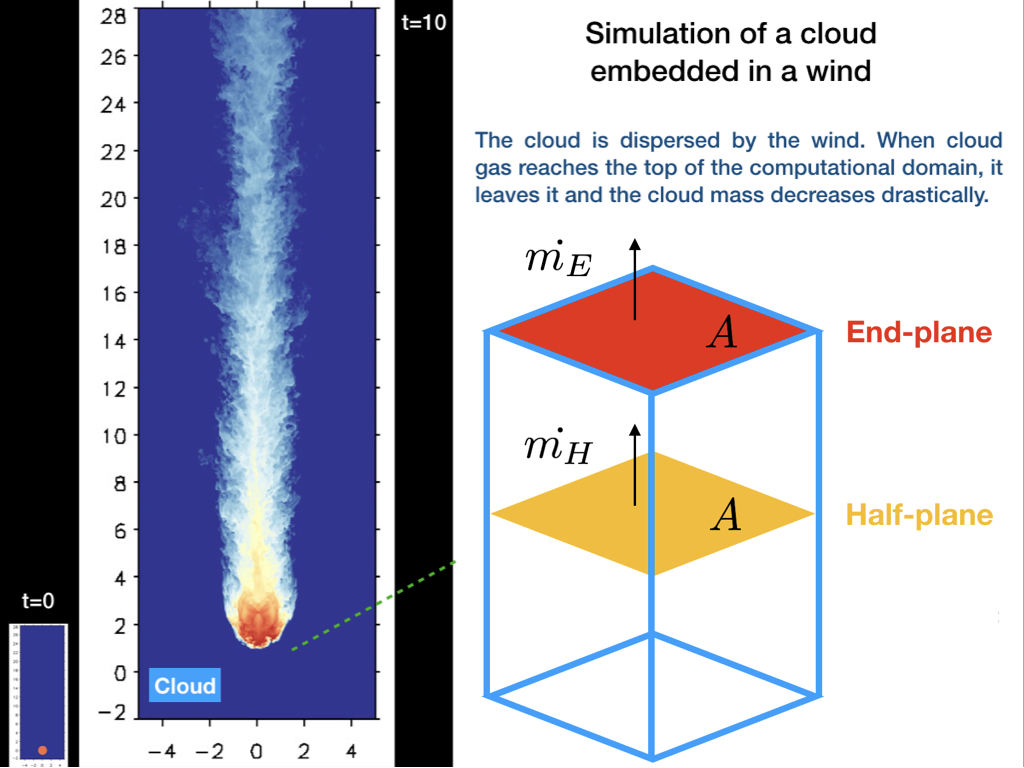


The wind disperses the cloud, which becomes elongated like a filament. As the simulation evolves cloud material flows off the computational domain, and towards the end of the simulation, cloud material is almost absent in the domain.

To understand how mass is removed from the cloud, we can calculate some diagnostics, e.g.:

1. The cloud mass inside the computational domain (Mass1)
2. The mass flux of cloud gas crossing half of the simulation domain (FluxE).
3. The mass flux of cloud gas crossing the back side of the simulation domain (FluxH).

The file **data_1.dat** contains these quantities, so we are going to do some data analysis.

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# First we need to read the data and place it into a pd DF

data_wc = pd.read_csv("../sample-data/data_1.dat", sep = "\s+")

print(data_wc)

print(type(data_wc))

         Time     Mass1     FluxH      FluxE
0    0.000000  61.18026  8.262365   8.262365
1    0.099800  61.18028  8.262365   8.262365
2    0.199956  61.18033  8.262365   8.262365
3    0.299681  61.18041  7.561459   8.262365
4    0.399916  61.18043  7.927189   8.262365
..        ...       ...       ...        ...
96   9.599985  23.29446  8.262365  10.585580
97   9.699971  20.33465  8.262365  11.147210
98   9.799818  17.66679  8.262365  12.601620
99   9.899956  15.14736  8.262365  12.675020
100  9.999821  12.79309  8.262365  12.691090

[101 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


In [47]:
# Get the data from each column into arrays:

times = np.array(data_wc["Time"])
massc = np.array(data_wc["Mass1"])
fluxh = np.array(data_wc["FluxH"])
fluxe = np.array(data_wc["FluxE"])

#print(times)
#print(type(times))
#print(fluxe)

## Plotting: cloud mass vs. time

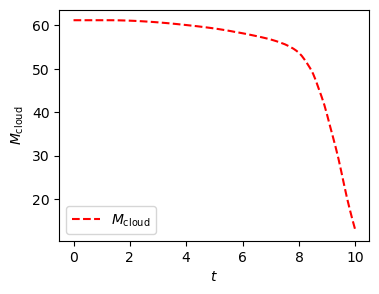

In [49]:
plt.figure(figsize=(4,3))

plt.plot(times, massc, linestyle = "--", color = "red",\
         label = r"$M_{\rm cloud}$")

plt.legend()

plt.xlabel(r"$t$")
plt.ylabel(r"$M_{\rm cloud}$")

plt.show()

## Plotting: Mass fluxes vs. time

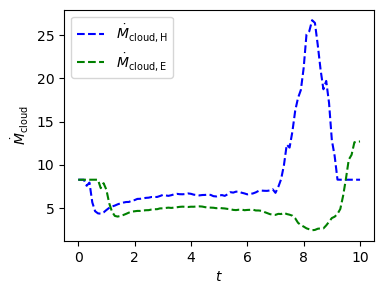

In [51]:
plt.figure(figsize=(4,3))

plt.plot(times, fluxh, linestyle = "--", color = "blue",\
         label = r"$\dot{M}_{\rm cloud, H}$")
plt.plot(times, fluxe, linestyle = "--", color = "green",\
         label = r"$\dot{M}_{\rm cloud, E}$")

plt.legend()

plt.xlabel(r"$t$")
plt.ylabel(r"${\dot M}_{\rm cloud}$")

plt.show()

# IO functions in pandas:

In [52]:
# Start our I/O function

def io_data_wc(filename):
    """
    This is a function that reads in a data file 
    and returns numpy arrays with the data in each
    column. 
    Input: filename (str)
    Outputs: numpy arrays
    Author: WEBB
    Date: 06.03.2024
    """
    
    # Create a pandas DF:
    data_wc = pd.read_csv(filename, sep = "\s+")
    
    # Get the data from each column into arrays:
    times = np.array(data_wc["Time"])
    massc = np.array(data_wc["Mass1"])
    fluxh = np.array(data_wc["FluxH"])
    fluxe = np.array(data_wc["FluxE"])

    return times, massc, fluxh, fluxe

## Using our IO function:

In [59]:
# Set the filename:

filename1 = "../sample-data/data_1.dat"

# Call your function to open the file and get the data into a tuple

t, m, fh, fe = io_data_wc(filename1)


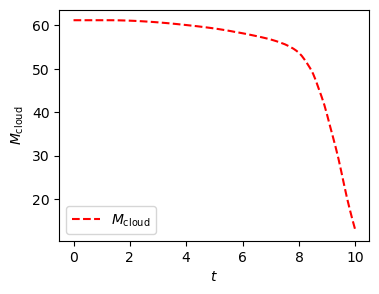

In [60]:
plt.figure(figsize=(4,3))

plt.plot(t, m, linestyle = "--", color = "red",\
         label = r"$M_{\rm cloud}$")

plt.legend()

plt.xlabel(r"$t$")
plt.ylabel(r"$M_{\rm cloud}$")

plt.show()

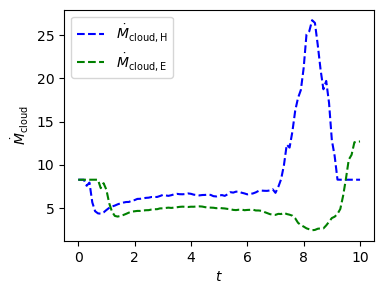

In [61]:
plt.figure(figsize=(4,3))

plt.plot(t, fh, linestyle = "--", color = "blue",\
         label = r"$\dot{M}_{\rm cloud, H}$")
plt.plot(t, fe, linestyle = "--", color = "green",\
         label = r"$\dot{M}_{\rm cloud, E}$")

plt.legend()

plt.xlabel(r"$t$")
plt.ylabel(r"${\dot M}_{\rm cloud}$")

plt.show()

### Basic data analysis

Suppose now that we want to work with the data, not just see them in plots, but actually use them for calculations.

To achieve this Python offers a large range of functions, e.g. say we want to multiply the array of times by 1 minute in seconds, and then save this in a new file jointly with the cloud mass.

For the cloud mass we want to convert g to kg.

In [62]:
# Multiple the time vector by 60 seconds = 1 min.

t_new = t*60. # time in seconds

# Multiply the mass vector by 1./1000.

m_new = m/1000. # mass in kg

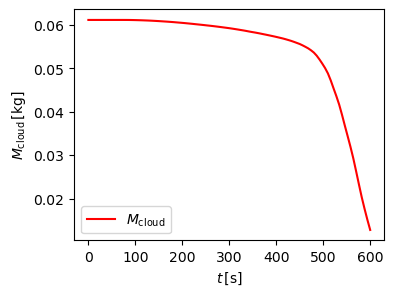

In [64]:
plt.figure(figsize=(4,3))

plt.plot(t_new, m_new, linestyle = "-", color = "red",\
         label = r"$M_{\rm cloud}$")

plt.legend()

plt.xlabel(r"$t\,\rm [s]$")
plt.ylabel(r"$M_{\rm cloud}\,\rm [kg]$")

plt.show()

# Create a new pandas data frame:

In [66]:
# 1. Create a dict

new_dict = {"time_s": t_new, "mass_kg": m_new}

# 2. Converting our dict into a DF

new_df = pd.DataFrame(new_dict)

print(new_df)

         time_s   mass_kg
0      0.000000  0.061180
1      5.988010  0.061180
2     11.997336  0.061180
3     17.980860  0.061180
4     23.994960  0.061180
..          ...       ...
96   575.999100  0.023294
97   581.998260  0.020335
98   587.989080  0.017667
99   593.997360  0.015147
100  599.989260  0.012793

[101 rows x 2 columns]


# Save a CSV file using Pandas:

In [70]:
new_df.to_csv("../sample-data/newest_data_1.csv", ",",\
              float_format = "{:.4e}".format, index=False)

# Example:

In [71]:
# Start our I/O function 

def io_data_cal(filename):
    
    """
    This is a function that reads in a data file 
    and returns numpy arrays with the data in each
    column. 
    Input: filename (str)
    Outputs: numpy arrays
    Author: WEBB
    Date: 06.03.2024
    """
    
    # Create a pandas DF:
    data_wc = pd.read_csv(filename, sep = ",")
    
    # Get the data from each column into arrays:
    dur = np.array(data_wc["Duration"])
    pul = np.array(data_wc["Pulse"])
    mpu = np.array(data_wc["Maxpulse"])
    cal = np.array(data_wc["Calories"])
    
    return dur, pul, mpu, cal

In [74]:
# Call our function

dur_1, pul_1, mpu_1, cal_1 = io_data_cal("../sample-data/data_2.csv")

#print(pul_1)

In [78]:
# Writing a new data frame

new_df2 = pd.DataFrame({"mpu": mpu_1, "cal": cal_1})

# Output a new post-processed file

new_df2.to_csv("../sample-data/new_data_2.csv", ",", \
              float_format = "{:.2e}".format, index = None)

### Plotting: max pulse vs. calories

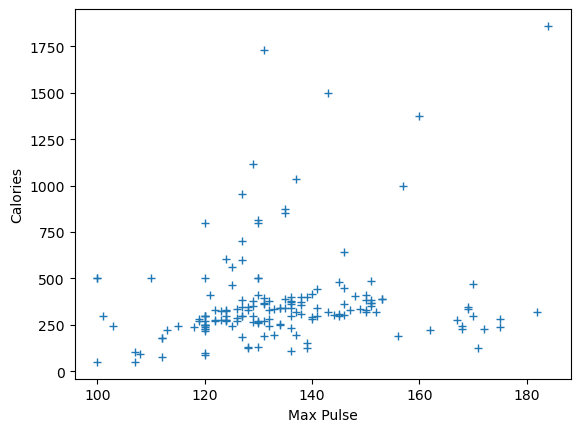

In [81]:
plt.figure()

plt.plot(mpu_1, cal_1, marker = "+", linestyle = " ")

plt.xlabel("Max Pulse")
plt.ylabel("Calories")

plt.show()

### Plotting: pulse vs. calories

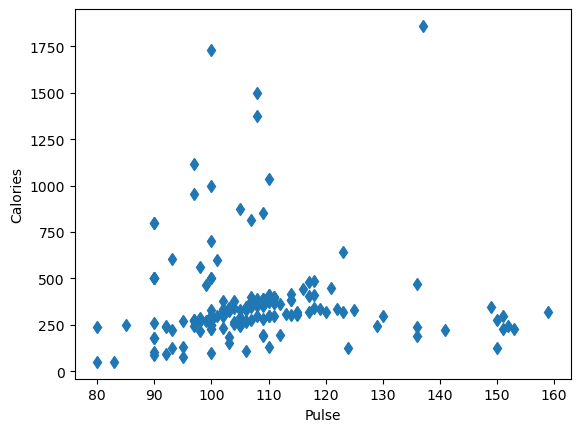

In [82]:
plt.figure()

plt.plot(pul_1, cal_1, marker = "d", linestyle = " ")

plt.xlabel("Pulse")
plt.ylabel("Calories")

plt.show()

### Plotting: duration vs. calories

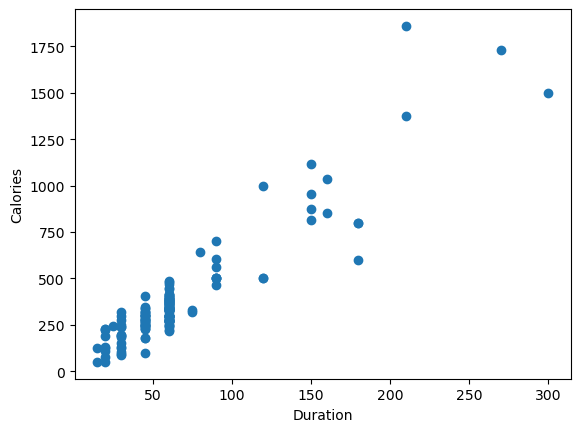

In [84]:
plt.figure()

plt.plot(dur_1, cal_1, marker = "o", linestyle = " ")

plt.xlabel("Duration")
plt.ylabel("Calories")

plt.show()